In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread, imsave
import cv2
import os

## Filtrado de pelos

Para comenzar, se define el filtro que eliminará los pelos.

In [2]:
def dull_razor(I):
    #Paso a gris la imagen original
    grayScale = cv2.cvtColor(I, cv2.COLOR_RGB2GRAY )
    
    #Filtro "Black Hat"
    kernel = cv2.getStructuringElement(1,(36,36)) 
    blackhat = cv2.morphologyEx(grayScale, cv2.MORPH_BLACKHAT, kernel)
    
    # Blur gaussiano
    bhg= cv2.GaussianBlur(blackhat,(3,3),cv2.BORDER_DEFAULT)
    
    # Segmentación
    mask = cv2.threshold(bhg,10,255,cv2.THRESH_BINARY)[1]
    
    # Se hace el inpaint para remplazar los pelos
    dst = cv2.inpaint(I,mask,6,cv2.INPAINT_TELEA)   

    return dst

Un ejemplo de una imagen filtrada se encuentra a continuación.

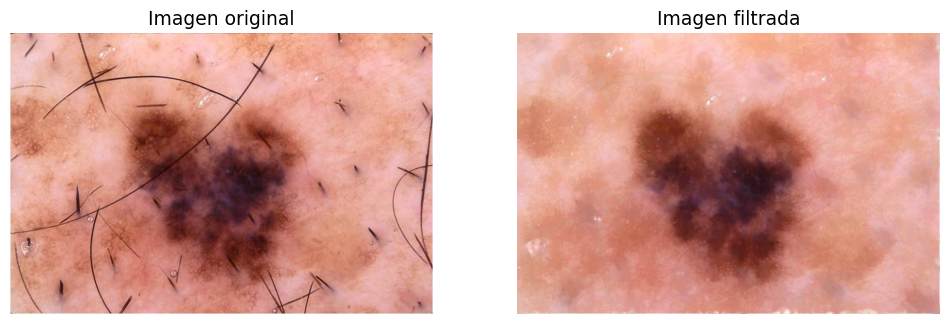

In [3]:
img = imread('Subconjunto_2018/images/ISIC_0000164.jpg')
img_filtrada = dull_razor(img)

plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title('Imagen original', fontsize=13.5)
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Imagen filtrada', fontsize=13.5)
plt.imshow(img_filtrada, cmap='gray')
plt.axis('off')
plt.show()

Con el filtro ya definido, recorremos el directorio *input_dir* y vamos procesando las imagenes, las cuales se guardaran en el directorio *output_dir*.

In [4]:
# Directorio de entrada y salida
input_dir = 'Subconjunto_2018/images'

output_dir = 'Subconjunto_2018_procesado'

# Crear el directorio de salida si no existe
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Obtener la lista de archivos en el directorio de entrada
files = os.listdir(input_dir)

# Iterar sobre los archivos en el directorio de entrada
for file in files:
    if 'superpixels' not in file:
        # Ruta completa de la imagen de entrada
        input_path = os.path.join(input_dir, file)
        
        # Leer la imagen usando imshow de matplotlib
        I = imread(input_path)
        
        # Aplicar la función dull_razor a la imagen
        I_out = dull_razor(I)
        
        # Construir el nuevo nombre de archivo agregando "_procesado"
        output_name = os.path.splitext(file)[0] + '_procesado' + os.path.splitext(file)[1]
        
        # Ruta completa de la imagen de salida
        output_path = os.path.join(output_dir, output_name)
        
        # Guardar la imagen procesada en el directorio de salida
        plt.imsave(output_path, I_out)